In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2025-03-06 12:21:21.003996: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 12:21:21.007066: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 12:21:21.016176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741263681.030568   38324 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741263681.034857   38324 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 12:21:21.051072: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [5]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sns.set_style('white')

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [7]:
n_labels = len(np.unique(y_train))
n_labels

10

array pointer = 4
x_train[4] shape: (28, 28)
labels: 0


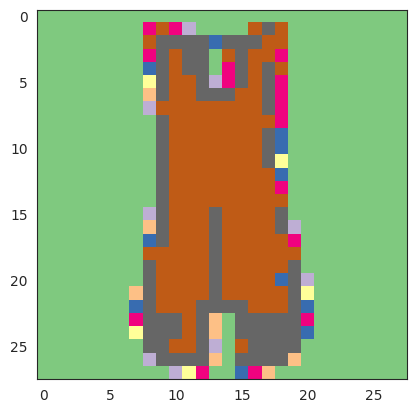

In [8]:
pointer = 4 #number of image in the dataset

print(f'array pointer = {pointer}')
print(f'x_train[{pointer}] shape: {X_train[pointer].shape}')
print(f'labels: {y_train[pointer]}')

plt.imshow(X_train[pointer],cmap='Accent')
plt.show()

In [9]:
def check_images(dataset, dataset_name):
    '''
    checks images for:
    *being an array
    *shape (28*28)
    *colour channel values
    '''
    invalid_count = 0 # counter for invalid images
    valid_count = 0 # counter for valid images

    for idx, image in enumerate(dataset):
        #check if the image is a Numpy array
        if not isinstance(image, np.ndarray):
            print(f'{dataset_name} - Index {idx}: Not a valid image array')
            invalid_count += 1
            continue

        #check shape (should be 28*28)
        if image.shape != (28, 28):
            print(f'{dataset_name} - Index {idx}: Incorrect shape {image.shape}')
            invalid_count += 1
            continue

        if not (image.dtype == np.unit8 and image.min() >= 0 and image.max() <= 255):
            print(f'{dataset_name} - Index {idx} : Invalid pixel values (Min@ {image.min(), Max: {image.max()}})')
            invalid_count += 1
            continue

        if not (image.dtype == np.unit8 and image.min() >= 0 and image.max() <= 255):
            print(f'{dataset_name} - Index {idx} : Contains NaN values')
            invalid_count += 1
            continue

        valid_count += 1

    print(f'\n{dataset_name}: {valid_count} valid images, {invalid_count} invalid images')

In [10]:
#run checks on both datasets
print('Checking Images...\n')
check_images(X_train, 'Train')
check_images(X_test, 'Test')

Checking Images...



AttributeError: module 'numpy' has no attribute 'unit8'

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X_train,
                                    y_train,
                                    test_size=0.2,
                                    random_state=0
                                    )

print('*Train set:', X_train.shape, y_train.shape,)
print('*Validation set:', X_val.shape, y_val.shape)
print('*Test set:', X_test.shape, y_test.shape)

NameError: name 'train_test_split' is not defined